In [106]:
import numpy as np
from matplotlib import pyplot as plt

Define the problem parameters


In [107]:
A = np.array([[1, 3], [3, 1]]) # low dimensions to plot it, you can test larger sizes
b = np.array([-1, 2])

lmbda = 0.5


The function to be minimized is $\frac{1}{2}\|Ax-b\|_2^2 + \lambda \|x\|_1$

In [108]:
f = lambda x: 0.5 * np.sum((A @ x - b) ** 2)
F = lambda x: f(x) + lmbda * np.sum(np.abs(x))

# derivative of f from matrix calculus
df = lambda x: A.T @ (A @ x) - A.T @ b


Plot the function

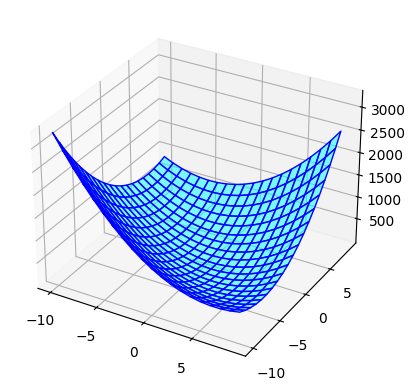

In [109]:
# this function has been prepared only for the visualization sake, no need to go through this but it renders some nice
# graphics :)
Fplot = lambda r1, r2: (r1 * A[0, 0] + r2 * A[0, 1] - b[0]) ** 2 + (r1 * A[1, 0] + r2 * A[1,1] - b[1]) ** 2 + lmbda * (np.abs(r1) + np.abs(r2))
xx, yy = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Fplot(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])

ISTA with backtracking
----------------------------
Parameters of ISTA

In [110]:
MAX_ITER = 1e3
TOL_DIST_X = 1e-6
# initial value for alpha
gamma = 1
# parameter for backtracking
eta = 0.99

Initialization: test different inizializations, the function is convex, you always converge to the same solution

In [111]:
# initialize x
x = np.array([10, -9])
grad_norm = 1e10
distanceX = 1e10

# initialize the list with all the estimates
all_x = [x]
x_past = x

In [112]:
def soft_thresholding(x, lmbda):
    return np.sign(x) * np.maximum(np.abs(x) - lmbda, 0)

Main loop

In [113]:
cnt = 0
gamma_current = gamma
while cnt < MAX_ITER and distanceX > TOL_DIST_X:
    # compute the argument of the proximal operator and perform soft thresholding of x
    x_current = soft_thresholding(x_past - gamma_current * df(x_past), lmbda*gamma_current)

    # iterate the backtracking procedure until the stopping criterion is met
    while F(x_current) > F(x_past) + df(x_past).T @ (x_current - x_past) + 1 / (2 * gamma_current) * np.linalg.norm(x_current - x_past) ** 2:
        # update gamma
        gamma_current *= eta

        # compute again x and perform soft thresholding
        x_current = soft_thresholding(x_past - gamma_current * df(x_past), lmbda*gamma_current)

    # compute the stopping criteria
    distanceX = np.linalg.norm(x_current - x_past)

    cnt = cnt + 1
    # store the estimate
    all_x.append(x_current)
    x_past = x_current


Plot all the estimates

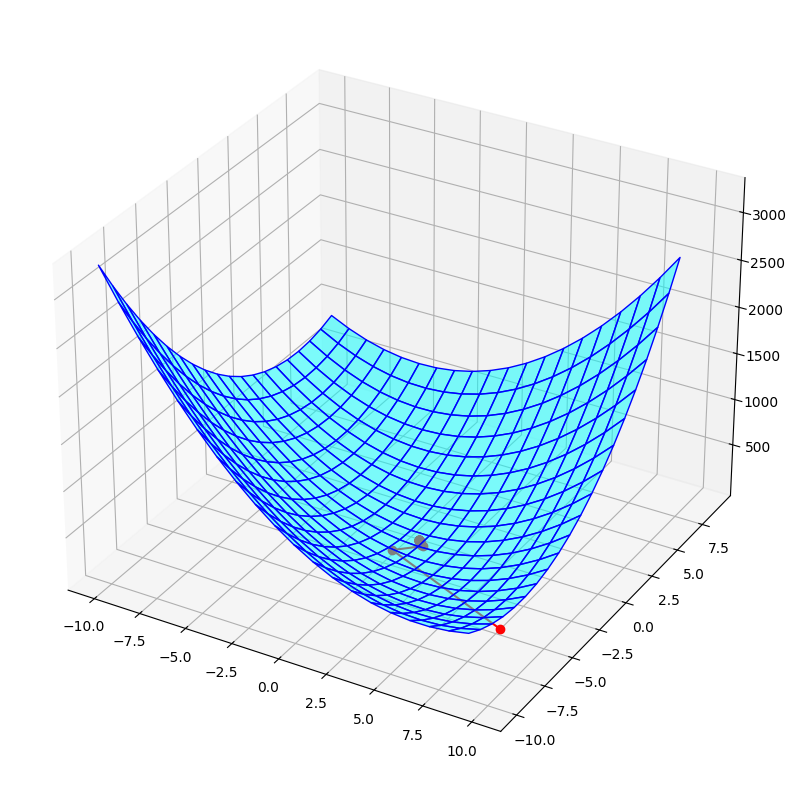

In [114]:
# plot the new estimate
xxplot = [x[0] for x in all_x]
yyplot = [x[1] for x in all_x]
zzplot = Fplot(np.array(xxplot), np.array(yyplot))

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Fplot(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])
ax.plot3D(xxplot, yyplot, zzplot, 'r-o')

Compare the number of iteration needed for convergence with backtracking with the number of iteration required using the optimal alpha

In [115]:
print(f'nr of iteration of ISTA with backtracking (before stopping criteria met): {cnt}\n')
print(f'Solution of ISTA: [{x_current[0]:.4f}, {x_current[1]:.4f}]\n')
print(f'Value of the functional: {F(x_current):.4f}\n')

nr of iteration of ISTA with backtracking (before stopping criteria met): 44

Solution of ISTA: [0.7500, -0.5000]

Value of the functional: 0.6875



FISTA
-----
Parameters of FISTA

In [116]:
MAX_ITER = 1e3
TOL_DIST_X = 1e-6
# set the optimal value for gamma
gamma = 1 / max(np.linalg.eigvals(A.T @ A))

Initialization: test different inizializations, the function is convex, you always converge to the same solution

In [117]:
# initialize x
x = np.array([10, -7])

# initialize y
y = x

# initialize alpha
alpha = 1

grad_norm = 1e10
distanceX = 1e10

# initialize the list with all the estimates
all_x = [x]
alpha_past = alpha



Main loop

In [118]:
cnt = 0
while cnt < MAX_ITER and distanceX > TOL_DIST_X:
    # compute the argument of the proximal operator
    x = y - gamma * df(y)

    # perform soft thresholding of x
    x = soft_thresholding(x, gamma*lmbda)

    # update gamma
    alpha_past = alpha
    alpha = (1 + np.sqrt(1 + 4*alpha_past ** 2)) / 2

    # update y
    y = x + ((alpha_past - 1) / alpha) * (x - all_x[-1])

    # compute the stopping criteria
    distanceX = np.linalg.norm(x - all_x[-1])

    # store the estimate
    all_x.append(x)
    
    cnt += 1


Plot all the estimates

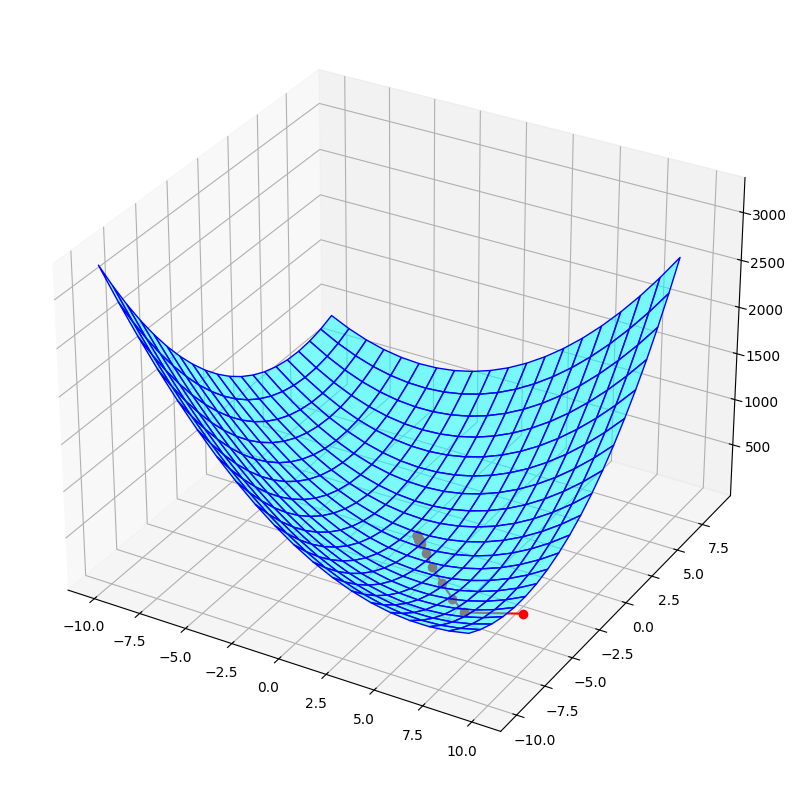

In [119]:
# plot the new estimate
xxplot = [x[0] for x in all_x]
yyplot = [x[1] for x in all_x]
zzplot = Fplot(np.array(xxplot), np.array(yyplot))

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Fplot(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])
ax.plot3D(xxplot, yyplot, zzplot, 'r-o')

In [120]:
print(f'nr of iteration of FISTA (before stopping criteria met): {cnt}\n')
print(f'Solution of FISTA: [{x_current[0]:.4f}, {x_current[1]:.4f}]\n')
print(f'Value of the functional: {F(x_current):.4f}\n')

nr of iteration of FISTA (before stopping criteria met): 69

Solution of FISTA: [0.7500, -0.5000]

Value of the functional: 0.6875

